In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import pickle
from geopy.distance import geodesic


from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("xgboost",xgb.__version__)

numpy 1.26.4
pandas 2.2.2
xgboost 2.1.1


In [9]:
df=pd.read_csv('ZomatoModel.csv')

In [10]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [13]:
df.shape

(45593, 20)

In [11]:
df.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [14]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [15]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [16]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("------------------------------------")

ID
ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
------------------------------------
Delivery_perso

In [17]:
def extract_column_value(df):
    # Ensure 'Time_taken(min)' is a string and then convert to int
    df['Time_taken'] = df['Time_taken(min)'].apply(lambda x: int(str(x).split(' ')[1].strip()) if isinstance(x, str) else x)

    # Ensure 'Weatherconditions' is a string before splitting
    df['Weather_conditions'] = df['Weatherconditions'].apply(lambda x: str(x).split(' ')[1].strip() if isinstance(x, str) else x)

    # Ensure 'Delivery_person_ID' is a string before splitting
    df['City_code'] = df['Delivery_person_ID'].astype(str).str.split("RES", expand=True)[0]

# Call the function and display the result
extract_column_value(df)
df[['Time_taken(min)', 'Weather_conditions', 'City_code']].head()



,Time_taken(min),Weather_conditions,City_code
0,(min) 24,Sunny,INDO
1,(min) 33,Stormy,BANG
2,(min) 26,Sandstorms,BANG
3,(min) 21,Sunny,COIMB
4,(min) 30,Cloudy,CHEN


In [18]:
df.drop(['Weatherconditions'],axis=1,inplace=True)

In [19]:
df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [20]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_taken,Weather_conditions,City_code
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,High,2,Snack,motorcycle,0,No,Urban,(min) 24,24,Sunny,INDO
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,33,Stormy,BANG
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,26,Sandstorms,BANG
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,21,Sunny,COIMB
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,30,Cloudy,CHEN


In [21]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'Time_taken', 'Weather_conditions',
       'City_code'],
      dtype='object')

In [22]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
45588,False
45589,False
45590,False
45591,False


In [23]:
## Update Datatypes

df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

In [24]:
df.replace('NaN', float(np.nan), regex=True,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43739 non-null  float64       
 1   Delivery_person_Ratings      43685 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Orderd                  43862 non-null  object        
 8   Time_Order_picked            45593 non-null  object        
 9   Road_traffic_density         44992 non-null  object        
 10  Vehicle_condition            45593 non-null  int64         
 11  Type_of_order                45593 non-nu

In [26]:
df.isnull().sum().sort_values(ascending=False)

,0
Delivery_person_Ratings,1908
Delivery_person_Age,1854
Time_Orderd,1731
City,1200
multiple_deliveries,993
Weather_conditions,616
Road_traffic_density,601
Festival,228
Type_of_vehicle,0
Time_taken,0


In [27]:
#handle null values
df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)

In [28]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731
Time_Order_picked,0
Road_traffic_density,0


In [29]:
    df["day"] = df.Order_Date.dt.day
    df["month"] = df.Order_Date.dt.month
    df["quarter"] = df.Order_Date.dt.quarter
    df["year"] = df.Order_Date.dt.year
    df['day_of_week'] = df.Order_Date.dt.day_of_week.astype(int)
    df["is_month_start"] = df.Order_Date.dt.is_month_start.astype(int)
    df["is_month_end"] = df.Order_Date.dt.is_month_end.astype(int)
    df["is_quarter_start"] = df.Order_Date.dt.is_quarter_start.astype(int)
    df["is_quarter_end"] = df.Order_Date.dt.is_quarter_end.astype(int)
    df["is_year_start"] = df.Order_Date.dt.is_year_start.astype(int)
    df["is_year_end"] = df.Order_Date.dt.is_year_end.astype(int)
    df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]),1,0)

In [30]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Road_traffic_density,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,High,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Jam,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Low,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Medium,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,High,...,1,2022,5,0,0,0,0,0,0,1


In [31]:
# Convert Order_Date to datetime if it's not already
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Convert the 'Time_Orderd' and 'Time_Order_picked' columns to timedelta (duration)
df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

# Create formatted time columns as datetime objects
df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']

df['Time_Order_picked_formatted'] = df['Order_Date'] + np.where(
    df['Time_Order_picked'] < df['Time_Orderd'],
    pd.DateOffset(days=1),
    pd.DateOffset(days=0)) + df['Time_Order_picked']

# Make sure that the new columns are of datetime type
df['Time_Ordered_formatted'] = pd.to_datetime(df['Time_Ordered_formatted'])
df['Time_Order_picked_formatted'] = pd.to_datetime(df['Time_Order_picked_formatted'])

# Now calculate the order preparation time in minutes
df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60

# Handle null values by filling with the median
df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)

# Check the first few rows
df[['Time_Ordered_formatted', 'Time_Order_picked_formatted', 'order_prepare_time']].head()


,Time_Ordered_formatted,Time_Order_picked_formatted,order_prepare_time
0,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0
1,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0
2,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0
3,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0
4,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0


In [32]:
df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date','Time_taken'], axis=1, inplace=True)

In [33]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,High,2,Snack,motorcycle,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Jam,2,Snack,scooter,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Low,0,Drinks,motorcycle,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Medium,0,Buffet,motorcycle,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,High,1,Snack,scooter,...,2022,5,0,0,0,0,0,0,1,15.0


In [34]:
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")

In [35]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,High,2,Snack,motorcycle,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Jam,2,Snack,scooter,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Low,0,Drinks,motorcycle,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Medium,0,Buffet,motorcycle,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,High,1,Snack,scooter,...,5,0,0,0,0,0,0,1,15.0,6


In [36]:
df.drop(['Restaurant_longitude','Restaurant_latitude','Delivery_location_latitude','Delivery_location_longitude'],axis=1,inplace=True)

In [37]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,High,2,Snack,motorcycle,0.0,No,Urban,(min) 24,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,Jam,2,Snack,scooter,1.0,No,Metropolitian,(min) 33,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,Low,0,Drinks,motorcycle,1.0,No,Urban,(min) 26,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,(min) 21,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,High,1,Snack,scooter,1.0,No,Metropolitian,(min) 30,...,5,0,0,0,0,0,0,1,15.0,6


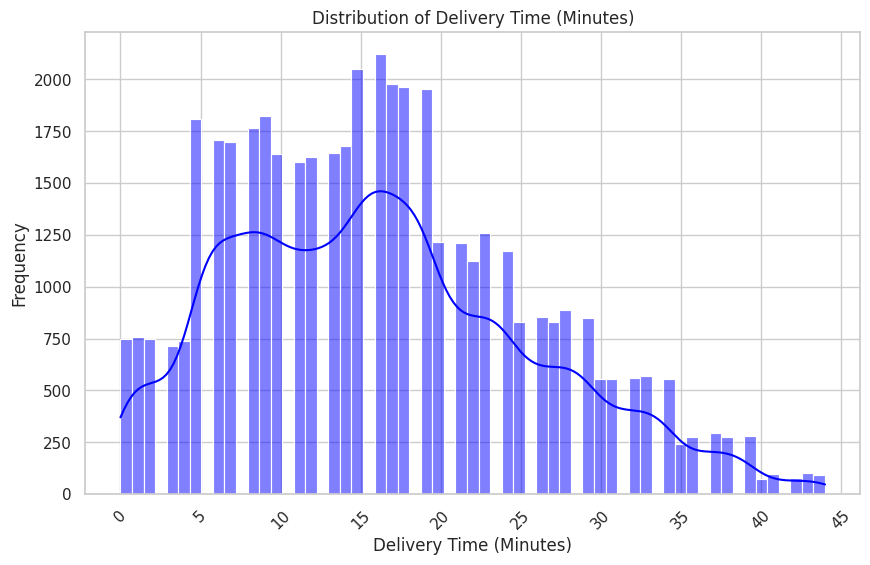

In [42]:
# Distribution of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken(min)'], kde=True, color='blue')
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=10)
plt.show()

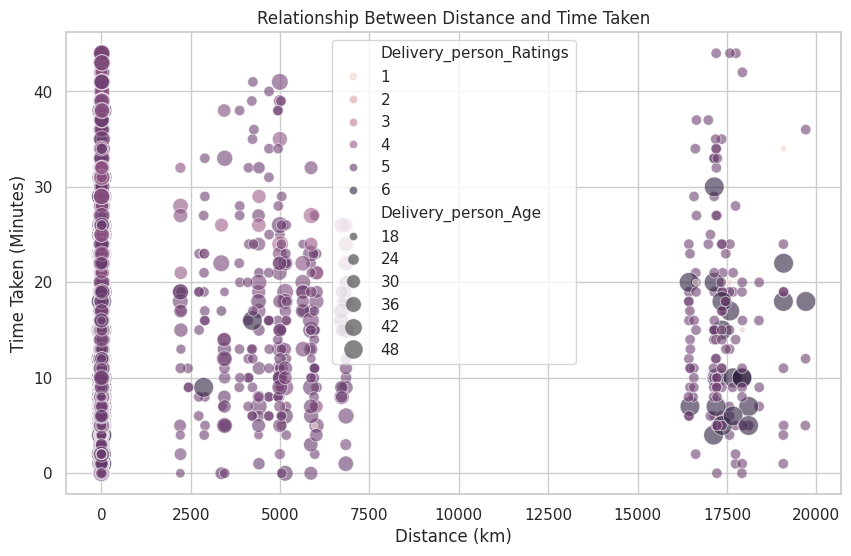

In [50]:
# Scatter Plot - Distance vs Time Taken
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='Time_taken(min)', data=df, hue='Delivery_person_Ratings', size='Delivery_person_Age', sizes=(20, 200), alpha=0.6)
plt.title('Relationship Between Distance and Time Taken')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (Minutes)')
plt.show()

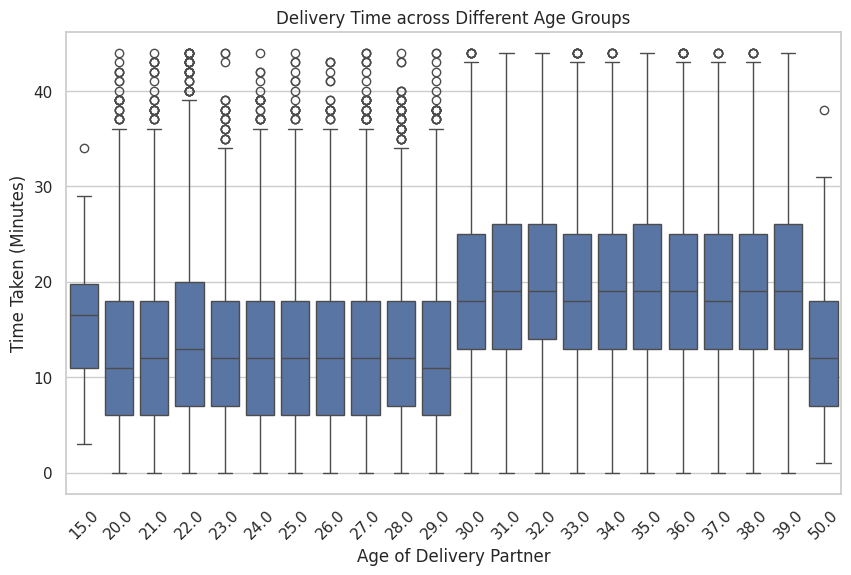

In [55]:
# Boxplot of Delivery Time by Delivery Partner Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery_person_Age', y='Time_taken(min)', data=df)
plt.title('Delivery Time across Different Age Groups')
plt.xlabel('Age of Delivery Partner')
plt.ylabel('Time Taken (Minutes)')
plt.xticks(rotation=45)
plt.show()

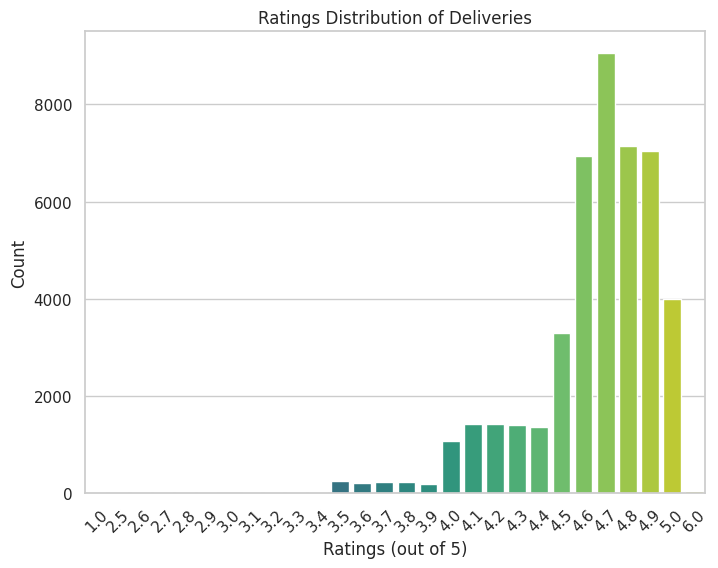

In [54]:
#Ratings Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Delivery_person_Ratings', data=df, palette='viridis')
plt.title('Ratings Distribution of Deliveries')
plt.xlabel('Ratings (out of 5)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

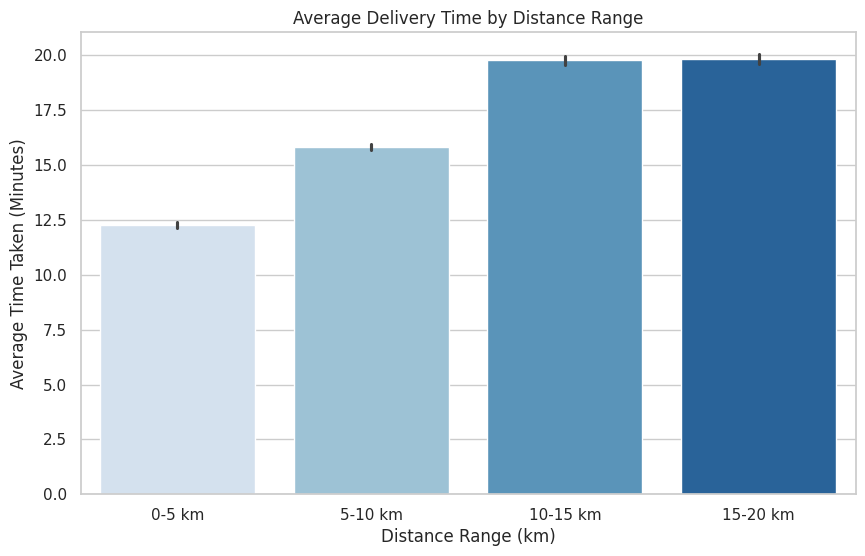

In [59]:
#Bar Plot of Average Delivery Time by Distance Range
df['distance_range'] = pd.cut(df['distance'], bins=[0, 5, 10, 15, 20], labels=['0-5 km', '5-10 km', '10-15 km', '15-20 km'])
plt.figure(figsize=(10, 6))
sns.barplot(x='distance_range', y='Time_taken(min)', data=df, estimator=np.mean, palette='Blues')
plt.title('Average Delivery Time by Distance Range')
plt.xlabel('Distance Range (km)')
plt.ylabel('Average Time Taken (Minutes)')
plt.show()

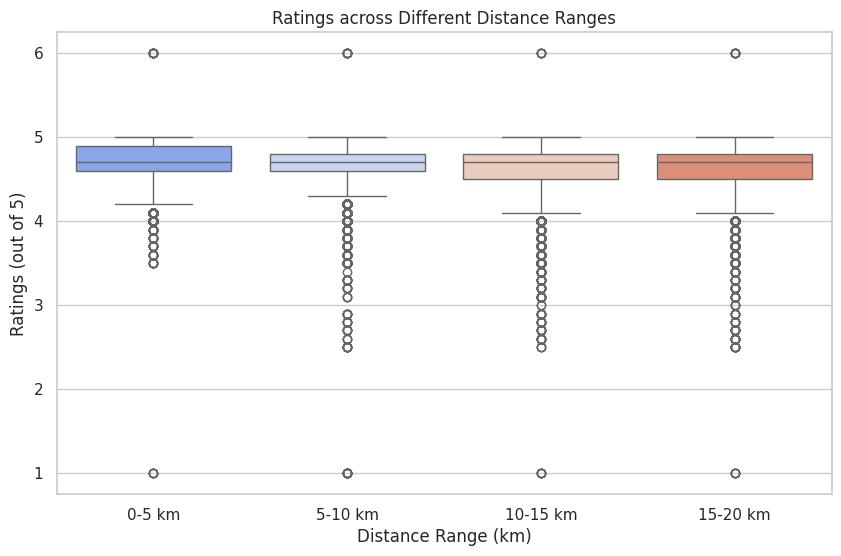

In [61]:
#Boxplot - Ratings by Delivery Distance
plt.figure(figsize=(10, 6))
sns.boxplot(x='distance_range', y='Delivery_person_Ratings', data=df, palette='coolwarm')
plt.title('Ratings across Different Distance Ranges')
plt.xlabel('Distance Range (km)')
plt.ylabel('Ratings (out of 5)')
plt.show()

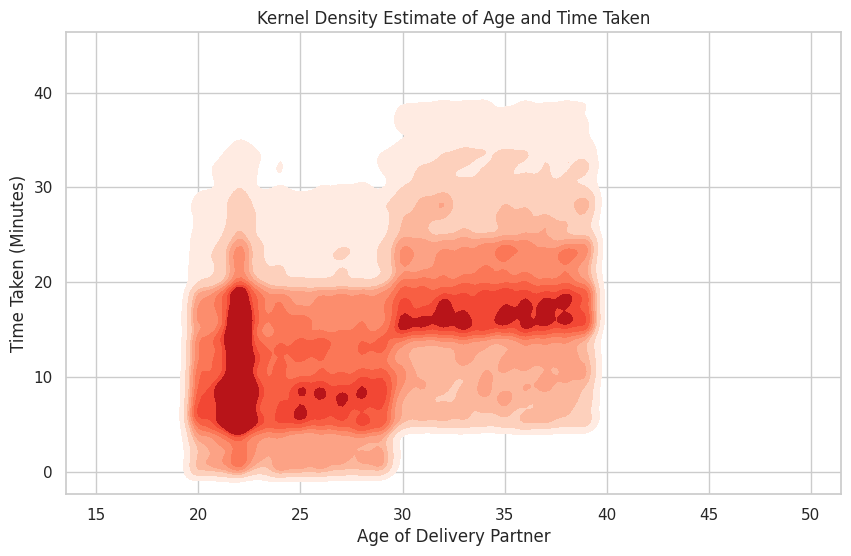

In [64]:
# KDE Plot of Age and Time Taken
plt.figure(figsize=(10, 6))
sns.kdeplot(x='Delivery_person_Age', y='Time_taken(min)', data=df, cmap='Reds', shade=True, bw_adjust=0.5)
plt.title('Kernel Density Estimate of Age and Time Taken')
plt.xlabel('Age of Delivery Partner')
plt.ylabel('Time Taken (Minutes)')
plt.show()


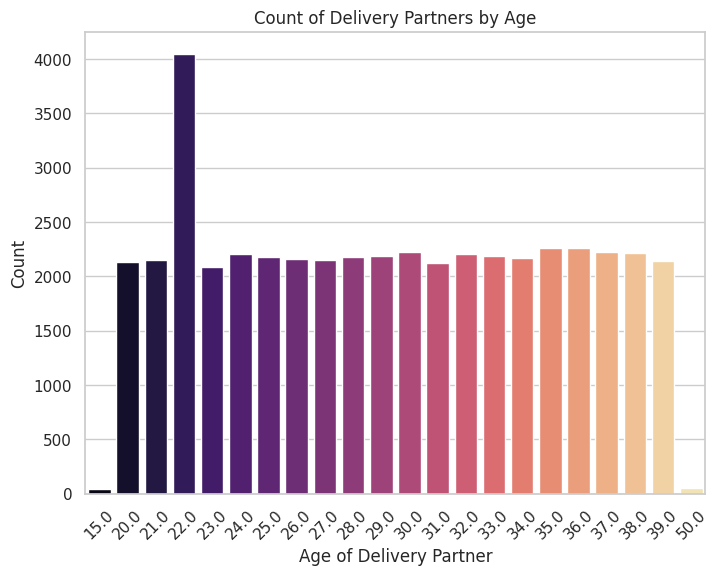

In [67]:
# Countplot of Delivery Partners' Age
plt.figure(figsize=(8, 6))
sns.countplot(x='Delivery_person_Age', data=df, palette='magma')
plt.title('Count of Delivery Partners by Age')
plt.xlabel('Age of Delivery Partner')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

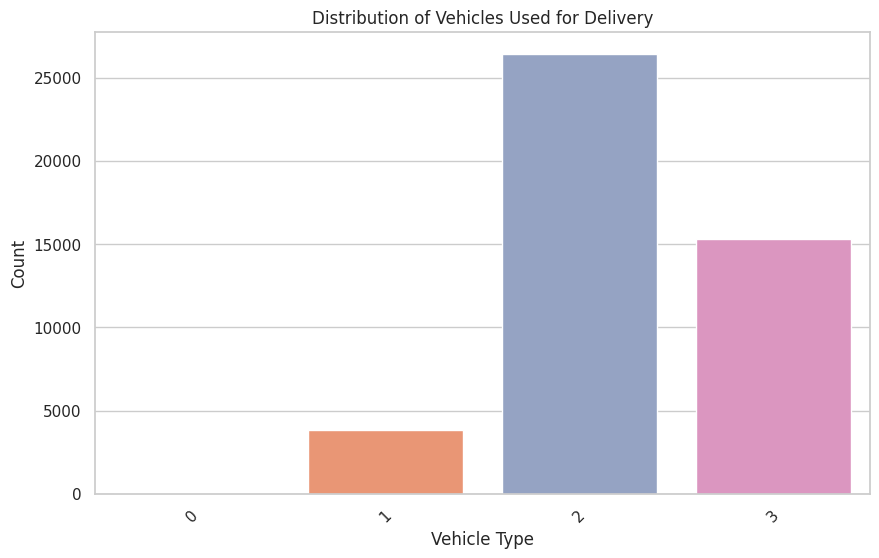

In [71]:
# Countplot - Types of Vehicles Used for Delivery
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_vehicle', data=df, palette='Set2')
plt.title('Distribution of Vehicles Used for Delivery')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


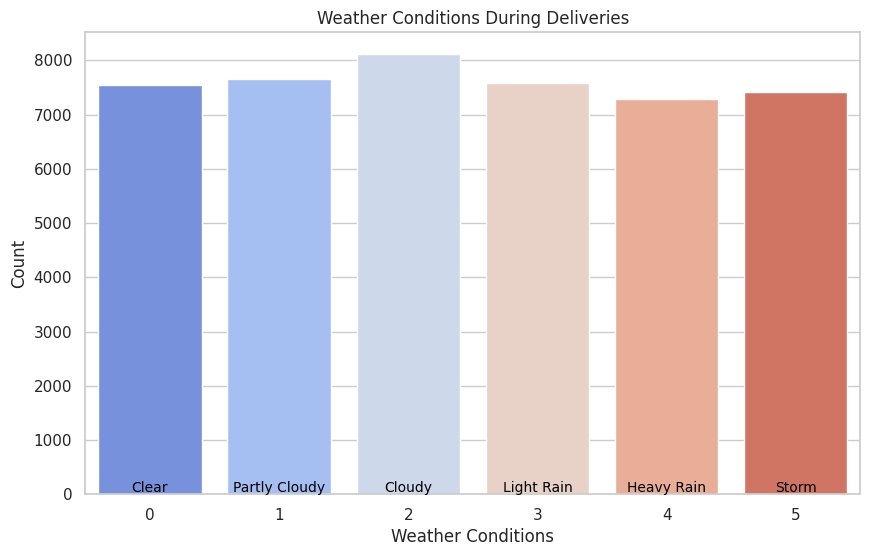

In [93]:
# Dictionary to map the weather conditions to human-readable labels
weather_mapping = {
    0: 'Clear',
    1: 'Partly Cloudy',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain',
    5: 'Storm'
}

# Create the bar plot with count of weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', data=df, palette='coolwarm')

# Adding title and labels
plt.title('Weather Conditions During Deliveries')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
# Annotating the weather condition labels on the x-axis
for index, label in weather_mapping.items():
    plt.text(index, 50, label, horizontalalignment='center', fontsize=10, color='black')



plt.show()




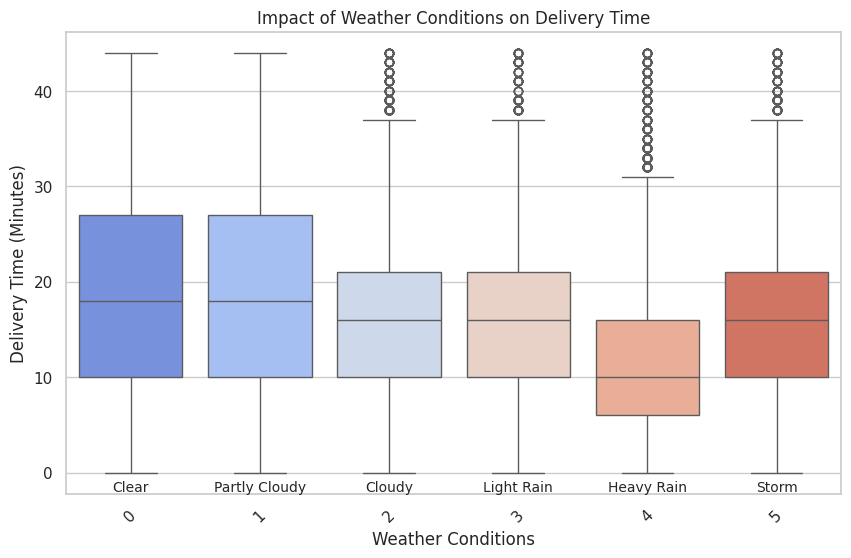

In [86]:
# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_conditions', y='Time_taken(min)', data=df, palette="coolwarm")

# Adding title and labels
plt.title('Impact of Weather Conditions on Delivery Time')
plt.xlabel('Weather Conditions')
plt.ylabel('Delivery Time (Minutes)')

# Annotating the plot with the category descriptions
for condition, label in weather_mapping.items():
    plt.text(condition, df['Time_taken(min)'].min() - 2, label,
             horizontalalignment='center', fontsize=10)

plt.xticks(rotation=45)
plt.show()

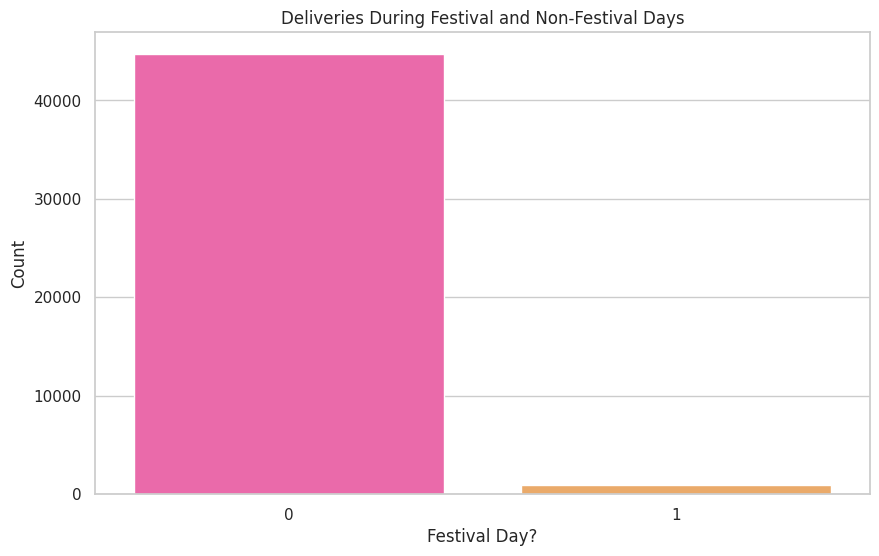

In [80]:
# Countplot - Deliveries During Festival Days
plt.figure(figsize=(10, 6))
sns.countplot(x='Festival', data=df, palette='spring')
plt.title('Deliveries During Festival and Non-Festival Days')
plt.xlabel('Festival Day?')
plt.ylabel('Count')
plt.show()



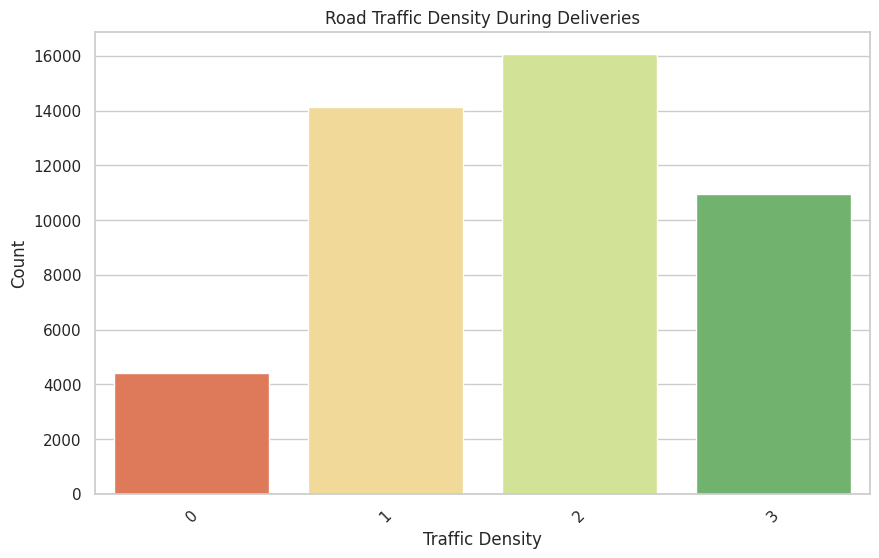

In [82]:
# Countplot - Road Traffic Density During Deliveries
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_traffic_density', data=df, palette='RdYlGn')
plt.title('Road Traffic Density During Deliveries')
plt.xlabel('Traffic Density')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


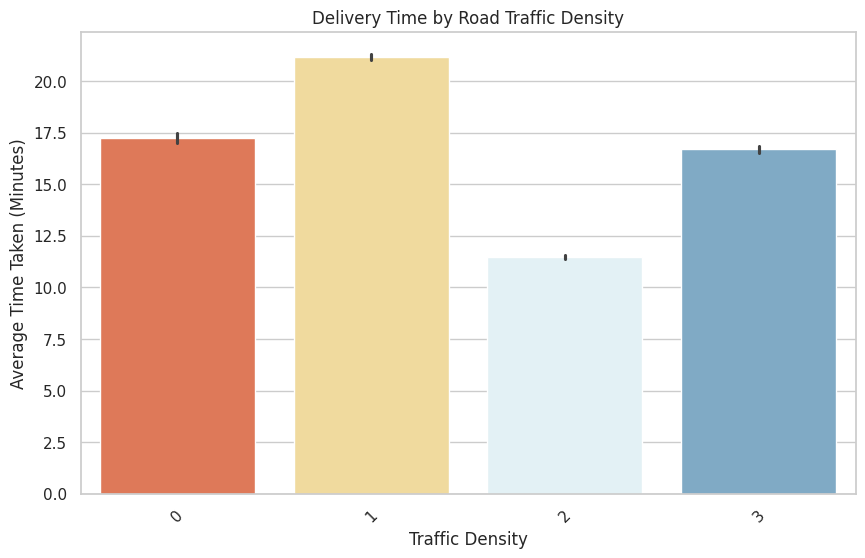

In [84]:
# Barplot - Delivery Time by Road Traffic Density
plt.figure(figsize=(10, 6))
sns.barplot(x='Road_traffic_density', y='Time_taken(min)', data=df, palette='RdYlBu')
plt.title('Delivery Time by Road Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Average Time Taken (Minutes)')
plt.xticks(rotation=45)
plt.show()


Label Encoder

In [39]:
# Apply Label Encoding as before
categorical_columns = df.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

# Display first few rows of the DataFrame with encoded values
print(df[categorical_columns].head())


   Road_traffic_density  Type_of_order  Type_of_vehicle  Festival  City  \
0                     0              3                2         0     2   
1                     1              3                3         0     0   
2                     2              1                2         0     2   
3                     3              0                2         0     0   
4                     0              3                3         0     0   

   Time_taken(min)  Weather_conditions  City_code  
0               14                   4         10  
1               23                   3          3  
2               16                   2          3  
3               11                   4          6  
4               20                   0          5  


Train Test Split


In [40]:
#Split features & label
X = df.drop('Time_taken(min)', axis=1)   # Features
y = df['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 25)
(36474,)
(9119, 25)
(9119,)


Standardization

In [41]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Model Building

In [ ]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,0,2,3,2,0.0,0,2,14,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,1,2,3,3,1.0,0,0,23,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,2,0,1,2,1.0,0,2,16,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,3,0,0,2,1.0,0,0,11,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,0,1,3,3,1.0,0,0,20,...,5,0,0,0,0,0,0,1,15.0,6


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Find the best model
models = [
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

In [ ]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

In [ ]:
import numpy as np

# Function to get input from the user
def get_user_input():
    # Taking input for age and ratings
    age = float(input("Enter Age of Delivery Partner: "))
    ratings = float(input("Enter Ratings of Previous Deliveries (out of 5): "))
    distance = float(input("Enter Total Distance (in km): "))

    # Return input as a NumPy array
    return np.array([[age, ratings, distance]])

# Collect user input
features = get_user_input()

# Assuming you have 25 features, fill in other features with zeros or some default values
# Here, we're assuming age, ratings, and distance are the first three features
final_features = np.zeros((1, 25))  # Create an array of zeros (for 25 features)
final_features[0, :3] = features  # Assign the first three values to the features you collected

# Make a prediction
predicted_delivery_time = model.predict(final_features)
print("Predicted Delivery Time in Minutes:", round(predicted_delivery_time[0], 2))


In [ ]:
with open('Zomato_model.pkl', 'wb') as file:
    pickle.dump(model, file)